In [9]:
#Importação dos pacotes necessários


import matplotlib.pyplot as plt # biblioteca de visualização de dados
import numpy as np # biblioteca para operações matemáticas multidimensionais
import pandas as pd # manipulação de dado em formato de dataframe
import seaborn as sns # biblioteca de visualização de informações estatísticas
import statsmodels.api as sm # biblioteca de modelagem estatística
import statsmodels.formula.api as smf
import tensorflow as tf

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from math import log
from scipy import stats
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, recall_score, roc_curve, auc
from sklearn.metrics import roc_curve, auc

In [10]:
import tensorflow as tf

#from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping
from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import LSTM, Embedding, SimpleRNN, Dense, Flatten
from keras.optimizers import Adam

from keras.layers import Dense
#from tensorflow.keras.models import Model
#from tensorflow.keras.optimizers import SGD, Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from sklearn.metrics import confusion_matrix

In [11]:
# Importação do dataset
df = pd.read_csv("./data/df.csv")
df_train = pd.read_csv("./data/train.csv")
df_test = pd.read_csv("./data/test.csv")

In [12]:
df.head(1)

,data,receita,mkt,fcl_binario,receita_scaled,mkt_scaled
0,30/03/01,17057,-6653,0,-0.815585,0.89869


In [13]:
df_train.head(1)

,data,receita,mkt,fcl_binario,receita_scaled,mkt_scaled
0,30/06/01,18359,-4090,0,-0.815082,0.909245


In [14]:
df_test.head(1)

,data,receita,mkt,fcl_binario,receita_scaled,mkt_scaled,phat_regressao,pred_regressao
0,31/03/11,718553,-99595,1,-0.544811,0.515948,0.641746,1


In [15]:
# Criação do modelo
model = Sequential()
model.add(Dense(64, activation='relu', input_shape = (2,)))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

In [17]:
# Visualizacao do modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 257 (1.00 KB)
Trainable params: 257 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# Define the EarlyStopping callback monitorando o validation loss
#early_stopping = EarlyStopping(
    #monitor='val_loss',  # Monitor validation loss
    #patience=30,         # Number of epochs with no improvement before stopping
    #restore_best_weights=True  # Restore the model's weights to the best observed during training
#)

In [19]:
# Fit do modelo
history = model.fit(
    df_train[["receita_scaled", "mkt_scaled"]], df_train[["fcl_binario"]],
    verbose=0, 
    epochs=100,
)

In [20]:
# vizualizacao das ultimas iteracoes
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,epoch
95,0.461694,0.861111,95
96,0.460540,0.847222,96
97,0.459397,0.847222,97
98,0.458343,0.847222,98
99,0.456813,0.847222,99


In [21]:
# Avaliacaoi do modelo
test_loss, test_acc = model.evaluate(df_train[["receita_scaled", "mkt_scaled"]], df_train[["fcl_binario"]])
print(f'Test accuracy: {test_acc}')

3/3 [==============================] - 0s 979us/step - loss: 0.4560 - accuracy: 0.8472
Test accuracy: 0.8472222089767456


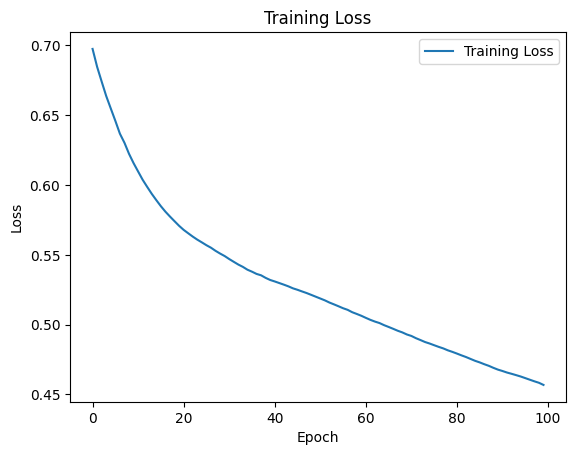

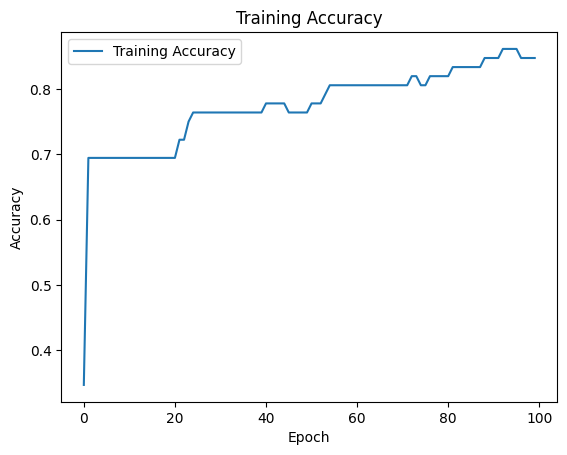

In [22]:
# Criacao da formula para plotar os graficos Trainning loss e Trainning Accuracy
def plot_history(history):
    # Plot training loss
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training Loss')

    # Plot training accuracy
    plt.figure()
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training Accuracy')

    plt.show()

# plotagem dos graficos
plot_history(history)

In [23]:
# Construção da matriz de confusão

In [24]:
# Adicionando os valores previstos de probabilidade com as variaveis teste
df_test['phat_nn'] = model.predict(df_test[["receita_scaled", "mkt_scaled"]])

1/1 [==============================] - 0s 28ms/step


In [25]:
df_test

,data,receita,mkt,fcl_binario,receita_scaled,mkt_scaled,phat_regressao,pred_regressao,phat_nn
0,31/03/11,718553,-99595,1,-0.544811,0.515948,0.641746,1,0.726868
1,30/09/06,255950,-59367,1,-0.723373,0.681610,0.664460,1,0.806580
2,31/12/14,1484728,-203671,0,-0.249071,0.087356,0.308087,0,0.464329
3,30/09/18,3999374,-510330,0,0.721570,-1.175489,0.014281,0,0.254415
4,30/03/01,17057,-6653,0,-0.815585,0.898690,0.855771,1,0.868851
5,30/09/07,293972,-49166,1,-0.708697,0.723618,0.753463,1,0.819118
6,31/12/10,595922,-62849,1,-0.592146,0.667271,0.812045,1,0.791138
7,30/06/17,2785464,-311160,0,0.253007,-0.355292,0.287621,0,0.328464
8,30/09/03,72202,-12183,1,-0.794299,0.875917,0.851270,1,0.863128
9,31/03/12,869791,-129928,1,-0.486434,0.391035,0.496930,0,0.662867


In [26]:
# Definiçao do cutoff 
cutoff = 0.5
df_test["pred_nn"] = np.where(df_test["phat_nn"]>=cutoff, 1, 0)

In [27]:
# Construção de função para a definição da matriz de confusão

from sklearn.metrics import confusion_matrix, accuracy_score,\
    ConfusionMatrixDisplay, recall_score

def matriz_confusao(observado,predicts,cutoff):
    
    values = predicts.values
    
    predicao_binaria = []
    
    for item in values:
        if item >= cutoff:
            predicao_binaria.append(1)
        else:
            predicao_binaria.append(0)
    
    cm = confusion_matrix(observado, predicao_binaria)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    
    sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
    especificidadee = recall_score(observado, predicao_binaria, pos_label=0)
    acuracia = accuracy_score(observado, predicao_binaria)

    #Visualizando os principais indicadores desta matriz de confusão
    indicadores = pd.DataFrame({'Sensitividade':[sensitividade],
                                'Especificidade':[especificidadee],
                                'Acurácia':[acuracia]})
    return indicadores

In [28]:
# criação da matriz de confusao
tn, fp, fn, tp = confusion_matrix(df_test["fcl_binario"], df_test["pred_nn"]).ravel()
matriz_de_confusao_nn = pd.DataFrame([[tp, fp], [fn, tn]],
                  index=['Verdadeiro', 'falso'],
                  columns=['Verdadeiro', 'Falso'])
matriz_de_confusao_nn = matriz_de_confusao_nn.rename_axis(index="Previsto", columns="Real")
matriz_de_confusao_nn

Real,Verdadeiro,Falso
Previsto,,
Verdadeiro,12,2
falso,0,4


In [29]:
# Principais indicadores desta matriz de confusão
sensitividade = recall_score(df_test["fcl_binario"], df_test["pred_nn"], pos_label=1)
especificidade = recall_score(df_test["fcl_binario"], df_test["pred_nn"], pos_label=0)
acuracia = accuracy_score(df_test["fcl_binario"], df_test["pred_nn"])
indicadores = pd.DataFrame({'Sensitividade':[sensitividade],
                                'Especificidade':[especificidade],
                                'Acurácia':[acuracia]})
indicadores

,Sensitividade,Especificidade,Acurácia
0,1.0,0.666667,0.888889


In [30]:
# Igualando critérios de especificidade e de sensitividade

def espec_sens(observado,predicts):
    
    # adicionar objeto com os valores dos predicts
    values = predicts.values
    
    # range dos cutoffs a serem analisados em steps de 0.01
    cutoffs = np.arange(0,1.01,0.01)
    
    # Listas que receberão os resultados de especificidade e sensitividade
    lista_sensitividade = []
    lista_especificidade = []
    
    for cutoff in cutoffs:
        
        predicao_binaria = []
        
        # Definindo resultado binário de acordo com o predict
        for item in values:
            if item >= cutoff:
                predicao_binaria.append(1)
            else:
                predicao_binaria.append(0)
                
        # Cálculo da sensitividade e especificidade no cutoff
        sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
        especificidadee = recall_score(observado, predicao_binaria, pos_label=0)
        
        # Adicionar valores nas listas
        lista_sensitividade.append(sensitividade)
        lista_especificidade.append(especificidadee)
        
    # Criar dataframe com os resultados nos seus respectivos cutoffs
    resultado = pd.DataFrame({'cutoffs':cutoffs,'sensitividade':lista_sensitividade,'especificidade':lista_especificidade})
    return resultado

In [31]:
#Especificidade' e 'cutoffs'. Assim, Criação de um dataframe que contém: 'sensitividade', 'especificidade' e 'cutoffs'

dados_plotagem = espec_sens(observado = df_test['fcl_binario'],
                            predicts = df_test['phat_nn'])

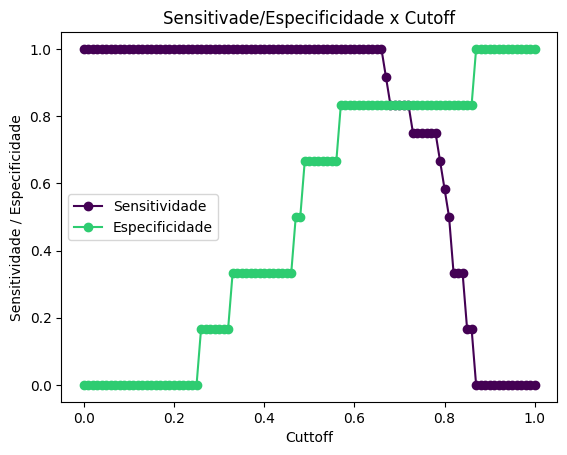

In [35]:
#Gráfico que mostra a variação da especificidade e da sensitividade#em função do cutoff

#plt.figure(figsize=(10,10))
plt.plot(dados_plotagem.cutoffs,dados_plotagem.sensitividade, '-o',
         color="#440154FF")
plt.plot(dados_plotagem.cutoffs,dados_plotagem.especificidade, '-o',
         color="#2ecc71")
plt.legend(['Sensitividade', 'Especificidade'])
plt.xlabel("Cuttoff")
plt.ylabel("Sensitividade / Especificidade")
plt.title("Sensitivade/Especificidade x Cutoff")
plt.show()

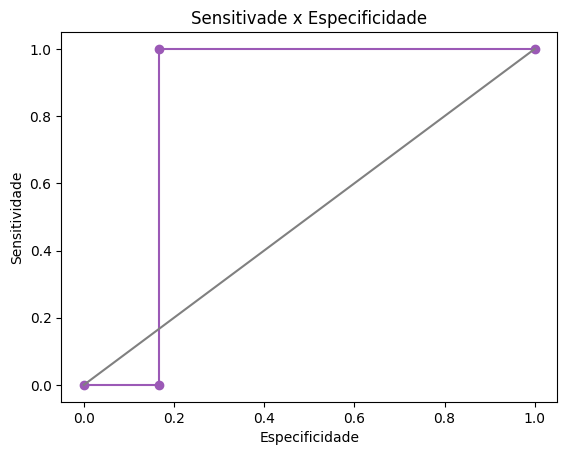

In [36]:
# Construção da curva ROC

#Função 'roc_curve' do pacote 'metrics' do sklearn

fpr, tpr, thresholds =roc_curve(df_test['fcl_binario'],df_test['phat_nn'])
roc_auc = auc(fpr, tpr)

#Cálculo do coeficiente de GINI
gini = (roc_auc - 0.5)/(0.5)

#Plotando a curva ROC
#plt.figure(figsize=(10,10))
plt.plot(fpr,tpr, '-o', color="#9b59b6")
plt.plot(fpr,fpr, color='gray')
#plt.title("Área abaixo da curva: %f" % roc_auc +
#          " | Coeficiente de GINI: %f" % gini, fontsize=17)
plt.xlabel("Especificidade")
plt.ylabel("Sensitividade")
plt.title("Sensitivade x Especificidade")
plt.show()